# Auto-Correction Exercise

This exercise will guide you through building an auto-correct system in Python. Follow the instructions in each step to complete the implementation.

## Step 1: Import Libraries

Import the necessary libraries

In [1]:
import os
import re
import numpy as np
import pandas as pd
from collections import Counter
import nltk

## Step 2: Load Data

Load a trusted text corpus to build the auto-correct system.

In [53]:
with open('/content/technologie_16.txt', 'r', encoding='ISO-8859-1') as f:
    file = f.readlines()

# A small sample of the corpus
file[0][:3000]

'Global blogger action day called\n'

## Step 3: Data Processing

Tokenize the text and convert all characters to lowercase to clean the data.

In [54]:
def process_data(lines):
    words = []
    for line in lines:
        line = line.strip().lower()
        word = re.findall(r'\w+', line)
        words.extend(word)
    return words

word_l = process_data(file)
vocab = set(word_l)
print(f"The first ten words in the text are: \n{word_l[0:10]}")
print(f"There are {len(vocab)} unique words in the vocabulary.")

The first ten words in the text are: 
['global', 'blogger', 'action', 'day', 'called', 'the', 'global', 'web', 'blog', 'community']
There are 318 unique words in the vocabulary.



## Step 4: Architecture Overview

This auto-correct architecture has four main components:

1. **Filtering Mispells**: Check if a word is in the vocabulary.
2. **Word Suggestion Mechanism**: Suggest candidate words based on various edit operations.
3. **Probability Distribution Mechanism**: Calculate the probability of each candidate word.
4. **Replace Mispells**: Replace the misspelled word with the most probable suggestion.

Implement each part step-by-step in the cells below.


### Step 4.1: Filtering Mispells

Write a function to identify words not present in the vocabulary.

In [55]:
def find_wrong_word(sent, vocab):
    wrong_words = []
    sent = sent.strip().lower().split(" ")
    for word in sent:
        if word not in vocab:
            wrong_words.append(word)
    return wrong_words

find_wrong_word('she is stadying', vocab)

['stadying']

### Step 4.2: Word Suggestion Mechanism

Implement functions to suggest words by deleting, switching, replacing, or inserting characters.

In [56]:
# Delete letter
def delete_letter(word, verbose=False):
    delete_l = []
    split_l = [(word[:i], word[i:]) for i in range(len(word))]
    delete_l = [s[0]+s[1][1:] for s in split_l]
    if verbose: print(f"input word : {word} \nsplit_l = {split_l}, \ndelete_l = {delete_l}")
    return delete_l

delete_word_l = delete_letter(word="bottle", verbose=True)

input word : bottle 
split_l = [('', 'bottle'), ('b', 'ottle'), ('bo', 'ttle'), ('bot', 'tle'), ('bott', 'le'), ('bottl', 'e')], 
delete_l = ['ottle', 'bttle', 'botle', 'botle', 'botte', 'bottl']


In [57]:
# Switch letter
def switch_letter(word, verbose=False):
    switch_l = []
    split_l = [(word[:i], word[i:]) for i in range(len(word))]
    for s in split_l:
        if len(s[1]) > 2:
            temp = s[0] + s[1][1] + s[1][0] + s[1][2:]
        elif len(s[1]) == 2:
            temp = s[0] + s[1][1] + s[1][0]
        elif len(s[1]) == 1:
            continue
        switch_l.append(temp)
    if verbose: print(f"Input word = {word} \nsplit_l = {split_l} \nswitch_l = {switch_l}")
    return switch_l

switch_word_l = switch_letter(word="ohld", verbose=True)

Input word = ohld 
split_l = [('', 'ohld'), ('o', 'hld'), ('oh', 'ld'), ('ohl', 'd')] 
switch_l = ['hold', 'olhd', 'ohdl']


In [58]:
# Replace letter
def replace_letter(word, verbose=False):
    letters = 'abcdefghijklmnopqrstuvwxyz'
    replace_l = []
    split_l = [(word[:i], word[i:]) for i in range(len(word))]
    for s in split_l:
        if len(s[1]) == 1:
            for l in letters:
                if l != s[1][0]:
                    replace_l.append(s[0] + l)
        elif len(s[1]) > 1:
            for l in letters:
                if l != s[1][0]:
                    replace_l.append(s[0] + l + s[1][1:])
    replace_set = set(replace_l)
    replace_l = sorted(list(replace_set))
    if verbose: print(f"Input word = {word} \nsplit_l = {split_l} \nreplace_l = {replace_l}")
    return replace_l

replace_l = replace_letter(word='hold', verbose=True)

Input word = hold 
split_l = [('', 'hold'), ('h', 'old'), ('ho', 'ld'), ('hol', 'd')] 
replace_l = ['aold', 'bold', 'cold', 'dold', 'eold', 'fold', 'gold', 'hald', 'hbld', 'hcld', 'hdld', 'held', 'hfld', 'hgld', 'hhld', 'hild', 'hjld', 'hkld', 'hlld', 'hmld', 'hnld', 'hoad', 'hobd', 'hocd', 'hodd', 'hoed', 'hofd', 'hogd', 'hohd', 'hoid', 'hojd', 'hokd', 'hola', 'holb', 'holc', 'hole', 'holf', 'holg', 'holh', 'holi', 'holj', 'holk', 'holl', 'holm', 'holn', 'holo', 'holp', 'holq', 'holr', 'hols', 'holt', 'holu', 'holv', 'holw', 'holx', 'holy', 'holz', 'homd', 'hond', 'hood', 'hopd', 'hoqd', 'hord', 'hosd', 'hotd', 'houd', 'hovd', 'howd', 'hoxd', 'hoyd', 'hozd', 'hpld', 'hqld', 'hrld', 'hsld', 'htld', 'huld', 'hvld', 'hwld', 'hxld', 'hyld', 'hzld', 'iold', 'jold', 'kold', 'lold', 'mold', 'nold', 'oold', 'pold', 'qold', 'rold', 'sold', 'told', 'uold', 'vold', 'wold', 'xold', 'yold', 'zold']


In [59]:
# Insert letter
def insert_letter(word, verbose=False):
    letters = 'abcdefghijklmnopqrstuvwxyz'
    insert_l = []
    split_l = [(word[:i], word[i:]) for i in range(len(word)+1)]
    for s in split_l:
        for l in letters:
            insert_l.append(s[0] + l + s[1])
    if verbose: print(f"Input word {word} \nsplit_l = {split_l} \ninsert_l = {insert_l}")
    return insert_l

insert_l = insert_letter('on', True)
print(f"Number of strings output by insert_letter('on') is {len(insert_l)}")

Input word on 
split_l = [('', 'on'), ('o', 'n'), ('on', '')] 
insert_l = ['aon', 'bon', 'con', 'don', 'eon', 'fon', 'gon', 'hon', 'ion', 'jon', 'kon', 'lon', 'mon', 'non', 'oon', 'pon', 'qon', 'ron', 'son', 'ton', 'uon', 'von', 'won', 'xon', 'yon', 'zon', 'oan', 'obn', 'ocn', 'odn', 'oen', 'ofn', 'ogn', 'ohn', 'oin', 'ojn', 'okn', 'oln', 'omn', 'onn', 'oon', 'opn', 'oqn', 'orn', 'osn', 'otn', 'oun', 'ovn', 'own', 'oxn', 'oyn', 'ozn', 'ona', 'onb', 'onc', 'ond', 'one', 'onf', 'ong', 'onh', 'oni', 'onj', 'onk', 'onl', 'onm', 'onn', 'ono', 'onp', 'onq', 'onr', 'ons', 'ont', 'onu', 'onv', 'onw', 'onx', 'ony', 'onz']
Number of strings output by insert_letter('on') is 78


**Combining Functions for Word Suggestions**

Combine the functions to edit one or two characters in a word.

In [60]:
# Edit one letter
def edit_one_letter(word, allow_switches=True):
    edit_one_set = set()
    insert_l = insert_letter(word)
    delete_l = delete_letter(word)
    replace_l = replace_letter(word)
    switch_l = switch_letter(word)
    if allow_switches:
        ans = insert_l + delete_l + replace_l + switch_l
    else:
        ans = insert_l + delete_l + replace_l
    edit_one_set = set(ans)
    return edit_one_set

In [61]:
tmp_word = "on"
tmp_edit_one_set = edit_one_letter(tmp_word)
tmp_edit_one_l = sorted(list(tmp_edit_one_set))

print(f"input word : {tmp_word} \nedit_one_l \n{tmp_edit_one_l}\n")
print(f"Number of outputs from edit_one_letter('on') is {len(edit_one_letter('on'))}")

input word : on 
edit_one_l 
['an', 'aon', 'bn', 'bon', 'cn', 'con', 'dn', 'don', 'en', 'eon', 'fn', 'fon', 'gn', 'gon', 'hn', 'hon', 'in', 'ion', 'jn', 'jon', 'kn', 'kon', 'ln', 'lon', 'mn', 'mon', 'n', 'nn', 'no', 'non', 'o', 'oa', 'oan', 'ob', 'obn', 'oc', 'ocn', 'od', 'odn', 'oe', 'oen', 'of', 'ofn', 'og', 'ogn', 'oh', 'ohn', 'oi', 'oin', 'oj', 'ojn', 'ok', 'okn', 'ol', 'oln', 'om', 'omn', 'ona', 'onb', 'onc', 'ond', 'one', 'onf', 'ong', 'onh', 'oni', 'onj', 'onk', 'onl', 'onm', 'onn', 'ono', 'onp', 'onq', 'onr', 'ons', 'ont', 'onu', 'onv', 'onw', 'onx', 'ony', 'onz', 'oo', 'oon', 'op', 'opn', 'oq', 'oqn', 'or', 'orn', 'os', 'osn', 'ot', 'otn', 'ou', 'oun', 'ov', 'ovn', 'ow', 'own', 'ox', 'oxn', 'oy', 'oyn', 'oz', 'ozn', 'pn', 'pon', 'qn', 'qon', 'rn', 'ron', 'sn', 'son', 'tn', 'ton', 'un', 'uon', 'vn', 'von', 'wn', 'won', 'xn', 'xon', 'yn', 'yon', 'zn', 'zon']

Number of outputs from edit_one_letter('on') is 129


In [62]:
# Edit two letters
def edit_two_letters(word, allow_switches = True):
    edit_two_set = set()
    one_edit = edit_one_letter(word)
    ans = []
    for w in one_edit:
        ans.append(w)
        ans.extend(edit_one_letter(w))
    edit_two_set = set(ans)
    return edit_two_set

In [63]:
tmp_edit_two_set = edit_two_letters("e")
tmp_edit_two_l = sorted(list(tmp_edit_two_set))
print(f"Number of strings with edit distance of two: {len(tmp_edit_two_l)}")
print(f"First 10 strings {tmp_edit_two_l[:10]}")
print(f"Last 10 strings {tmp_edit_two_l[-10:]}")
print(f"The data type of the returned object should be e set {type(tmp_edit_two_set)}")
print(f"Number of strings that are 2 edit distances from 'on' is {len(edit_two_letters('on'))}")

Number of strings with edit distance of two: 2654
First 10 strings ['', 'a', 'aa', 'aae', 'ab', 'abe', 'ac', 'ace', 'ad', 'ade']
Last 10 strings ['zv', 'zve', 'zw', 'zwe', 'zx', 'zxe', 'zy', 'zye', 'zz', 'zze']
The data type of the returned object should be e set <class 'set'>
Number of strings that are 2 edit distances from 'on' is 7154


### Step 4.3: Probability Distribution

Calculate the frequency of each word in the corpus and compute the probability distribution.

In [64]:
def get_count(word_l):
    word_count_dict = Counter(word_l)
    return word_count_dict

word_count_dict = get_count(word_l)
print(f"There are {len(word_count_dict)} key values pairs")
print(f"The count for the word 'organisation' is {word_count_dict.get('organisation',0)}")

There are 318 key values pairs
The count for the word 'organisation' is 2


In [65]:
def get_probs(word_count_dict):
    probs = {}
    total = sum(word_count_dict.values())
    for word in word_count_dict.keys():
        probs[word] = word_count_dict[word] / total
    return probs

probs = get_probs(word_count_dict)
print(f"Length of probs is {len(probs)}")
print(f"P('blogger') is {probs['blogger']:.4f}")

Length of probs is 318
P('blogger') is 0.0072


<Axes: xlabel='word'>

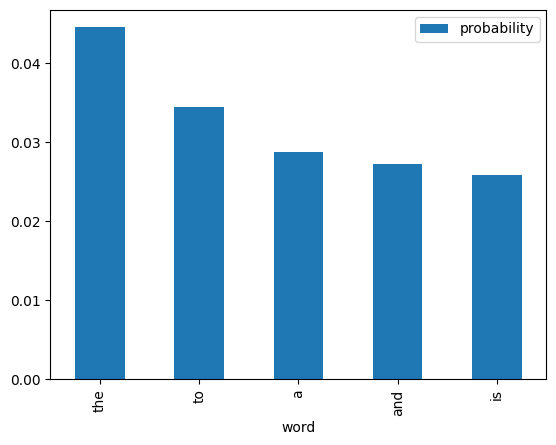

In [66]:
# Display probability distribution
prob_df = pd.DataFrame({'word': probs.keys(), 'probability': probs.values()}).sort_values(by='probability', ascending=False)
prob_df.sample(5)

prob_df.head().plot.bar(x='word', y='probability')

### Step 4.4: Replace Misspells with Correction

Write a function to replace misspelled words with the most probable corrections.

In [67]:
def get_corrections(word, probs, vocab, n=2, verbose=False):
    suggestions = []
    n_best = []

    if word in probs.keys():
        suggestions.append(word)
    for w in edit_one_letter(word):
        if len(suggestions) == n:
            break
        if w in probs.keys():
            suggestions.append(w)
    for w in edit_two_letters(word):
        if len(suggestions) == n:
            break
        if w in probs.keys():
            suggestions.append(w)

    best_words = sorted({s: probs[s] for s in suggestions}.items(), key=lambda x: x[1], reverse=True)
    n_best = best_words

    if verbose: print("entered word = ", word, "\nsuggestions = ", suggestions)
    return n_best

def get_correct_word(word, vocab, probs, n):
    corrections = get_corrections(word, probs, vocab, n, verbose=False)
    if len(corrections) == 0:
        return word

    final_word = corrections[0][0]
    final_prob = corrections[0][1]
    for i, word_prob in enumerate(corrections):
        if word_prob[1] > final_prob:
            final_word = word_prob[0]
            final_prob = word_prob[1]
    return final_word

get_correct_word('thee', vocab, probs, 100)

'the'

### Step 5: Final Auto-Correction Function

Combine all parts into a final function that corrects sentences.

In [68]:
def autocorrect(sentence, vocab, probs):
    print("Input sentence : ", sentence)
    wrong_words = find_wrong_word(sentence, vocab)
    print("Wrong words : ", wrong_words)
    correct_words = []
    for word in sentence.strip().lower().split(" "):
        if word in wrong_words:
            correct_word = get_correct_word(word, vocab, probs, 15)
            word = correct_word
        correct_words.append(word)
    print("Output Sentence : ", " ".join(correct_words).capitalize())

### Step 6: Demo

Apply your work to a sentence

In [69]:
autocorrect("Th group has a listt of aactions", vocab, probs)

Input sentence :  Th group has a listt of aactions
Wrong words :  ['th', 'listt', 'aactions']
Output Sentence :  The group has a list of action


In [79]:
autocorrect("It is jusst sutch a new way of doinng buasiness", vocab, probs)

Input sentence :  It is jusst sutch a new way of doinng buasiness
Wrong words :  ['jusst', 'sutch', 'doinng', 'buasiness']
Output Sentence :  It is just such a new way of doing business
